### Linear Regression for Solving Regression Problems  

Linear regression is a widely used technique for addressing regression problems. In this approach, the target variable is modeled as a **linear combination** (or weighted sum) of input features. The model's predictions are evaluated using a loss function, such as the **Root Mean Squared Error (RMSE)**, to measure performance.  

**Visual Summary:**  
![LR1.png](LR1.png)





## **Types of Linear Regression**
1. **Simple Linear Regression**  
   - Relationship between one independent variable \( x \) and a dependent variable \( y \).  
   - Model:  
     \[
     y = \beta_0 + \beta_1 x + \epsilon
     \]  
     - \( \beta_0 \): Intercept  
     - \( \beta_1 \): Slope  
     - \( \epsilon \): Error term  

2. **Multiple Linear Regression**  
   - Relationship between multiple independent variables \( x_1, x_2, \dots, x_n \) and a dependent variable \( y \).  
   - Model:  
     \[
     y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
     \]

---

## **Key Assumptions**
Linear regression assumes the following:  
1. **Linearity**: The relationship between predictors and the target variable is linear.  
2. **Homoscedasticity**: The variance of residuals (errors) is constant across predictions.  
3. **Independence**: Observations are independent.  
4. **Normality**: Residuals follow a normal distribution.  
5. **No multicollinearity**: Independent variables are not highly correlated in multiple regression.

---

## **How Linear Regression Works**
1. **Objective**: Minimize the sum of squared errors (Residual Sum of Squares - RSS):  
   \[
   \text{RSS} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
   \]
2. The regression line is found using **Ordinary Least Squares (OLS)**.

---

## **Evaluation Metrics**
1. **R-squared (\( R^2 \))**: Explains the proportion of variance in the dependent variable explained by the independent variables.  
2. **Mean Squared Error (MSE)**: Measures average squared difference between predicted and actual values.  
3. **Root Mean Squared Error (RMSE)**: Square root of MSE for interpretability.  
4. **Mean Absolute Error (MAE)**: Measures average absolute difference between predictions and actual values.

---
## **Applications**

- **Forecasting Sales**: Predict future sales based on marketing spend and strategies.  
- **Production Output Prediction**: Estimate production output using various input factors such as raw materials, labor, and machine hours.  
- **Financial Trend Analysis**: Analyze trends in financial data to make informed investment decisions.  
- **Quality Control**: Monitor and improve manufacturing processes to ensure consistent product quality.  


## Load Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the housing SalePrice dataset
df = pd.read_csv('train.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # For numerical columns
df['LotFrontage'] = imputer.fit_transform(df[['LotFrontage']])

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

## Visualize correlations between features

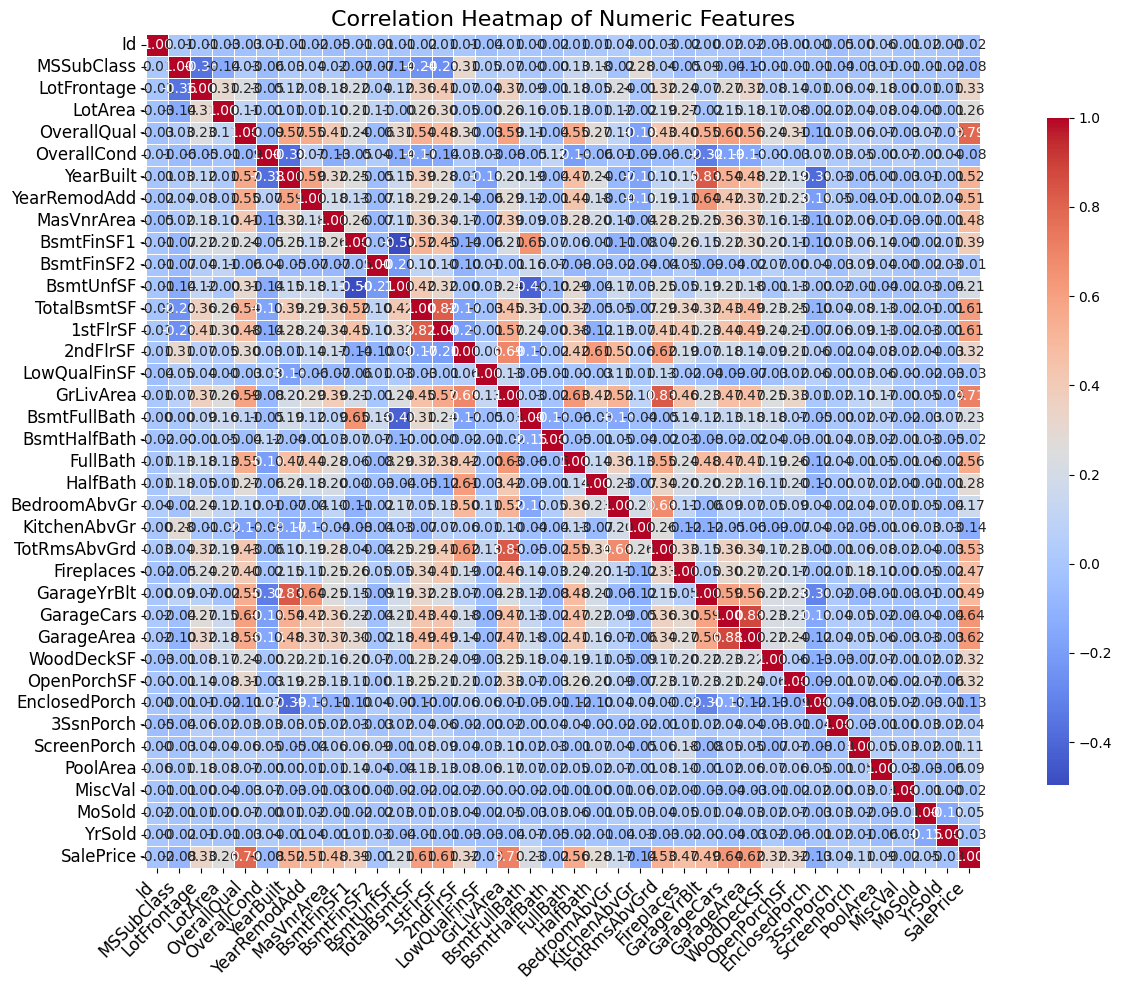

Mean Squared Error (MSE): 0.0310
Root Mean Squared Error (RMSE): 0.1762
R-squared (R2): 0.8336


In [3]:
# Filter only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Create a more visually appealing heatmap for the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="white",
    cbar_kws={"shrink": 0.8, "aspect": 30},
    square=True
)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Choose relevant features for linear regression
features = ['LotArea', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'FullBath', 'HalfBath']
X = df[features]
y = df['SalePrice']

# Log transform the target variable to normalize it
y = np.log1p(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict using the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


## Visualize the model performance

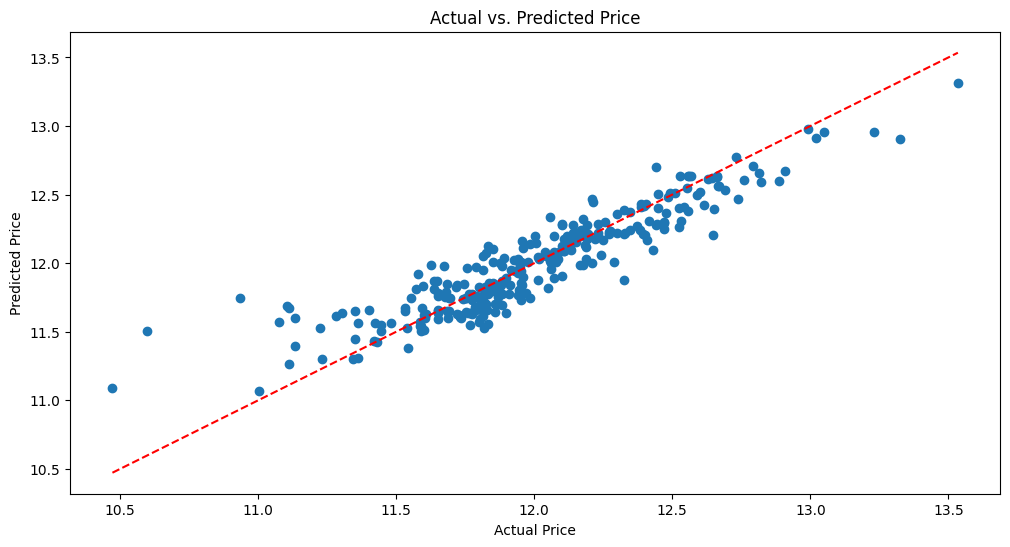

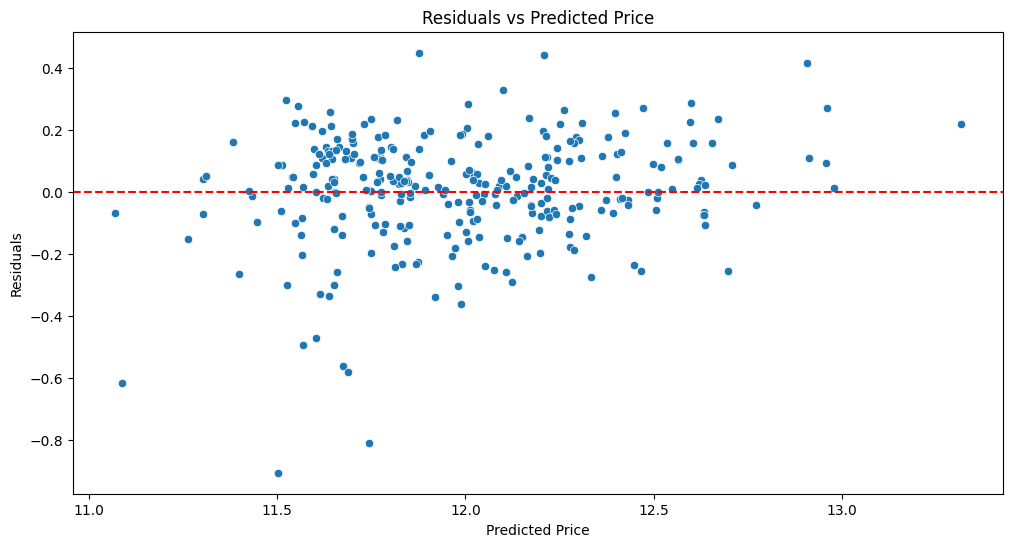

Feature Importance:
       Feature  Coefficient
1  OverallQual     0.169048
4   GarageCars     0.083249
2    GrLivArea     0.048353
7     HalfBath     0.040690
3  TotalBsmtSF     0.037775
5     1stFlrSF     0.037350
6     FullBath     0.033223
0      LotArea     0.031953


In [5]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()

# Residual plot to check for homoscedasticity
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print('Feature Importance:')
print(feature_importance)


## Key Insights
The scatter plot and residual plot together provide insights into model accuracy and potential improvements.
Feature importance analysis reveals which variables are most impactful, guiding potential feature engineering or further model refinement

---

## Key Obsevations
- OverallQual is the most impactful feature, significantly outweighing other predictors.
- Features related to size (e.g., GrLivArea, TotalBsmtSF, 1stFlrSF) and amenities (e.g., GarageCars, HalfBath, FullBath) are also important contributors.
- LotArea has the smallest coefficient, suggesting a relatively minimal impact on the prediction of sale prices.
This ranking can guide future feature engineering or help prioritize variables in model refinement